In [138]:
import networkx as nx
import pandas as pd
import plotly.graph_objects as go

In [125]:
df = pd.read_csv('./表间关系.csv')
df

,表一,表二,表间关系
0,ENTRY_DATA,OFFICE_CODES,一对一
1,ENTRY_DATA,BIOG_INST_DATA,一对多
2,ENTRY_DATA,STATUS_DATA,一对一
3,ENTRY_DATA,EVENTS_DATA,一对多
4,ENTRY_DATA,ALTNAME_DATA,一对一
...,...,...,...
465,BIOG_SOURCE_DATA,BIOG_MAIN,一对多
466,ENTRY_DATA,ENTRY_TYPES,多对多
467,STATUS_DATA,STATUS_TYPES,多对多
468,ENTRY_DATA,ASSOC_TYPES,多对多


In [187]:
G = nx.DiGraph()
for index, row in df.iterrows():
    if row['表间关系'] == '一对一':
        G.add_edge(row['表一'], row['表二'], color='green')
    elif row['表间关系'] == '一对多':
        G.add_edge(row['表一'], row['表二'], color='blue')
    elif row['表间关系'] == '多对多':
        G.add_edge(row['表一'], row['表二'], color='red')
        
pos = nx.spring_layout(G, k=2)
pos

{'ENTRY_DATA': array([-0.48814805,  0.3955644 ]),
 'OFFICE_CODES': array([-0.80187149,  0.59642126]),
 'BIOG_INST_DATA': array([-0.09132922, -0.03156377]),
 'STATUS_DATA': array([-0.8413651 , -0.26288324]),
 'EVENTS_DATA': array([-0.55109394,  0.16371351]),
 'ALTNAME_DATA': array([-0.95886531, -0.06837544]),
 'POSTED_TO_ADDR_DATA': array([-0.66291532,  0.71174609]),
 'TEXT_INSTANCE_DATA': array([-0.3374355 , -0.20322627]),
 'ASSOC_DATA': array([-0.12338542,  0.46334309]),
 'BIOG_ADDR_DATA': array([-2.62672468e-04,  9.14823523e-01]),
 'TEXT_CODES': array([ 0.25363419, -0.54933673]),
 'POSTING_DATA': array([-0.51521418,  0.61231728]),
 'KIN_DATA': array([0.21988709, 0.59093292]),
 'BIOG_TEXT_DATA': array([-0.37494121,  0.02323257]),
 'POSTED_TO_OFFICE_DATA': array([0.31453382, 0.13784912]),
 'BIOG_MAIN': array([0.61396731, 0.34999002]),
 'PLACE_CODES': array([0.95134524, 0.02410591]),
 'ADDR_PLACE_DATA': array([ 0.07445861, -0.70185367]),
 'SOCIAL_INSTITUTION_NAME_CODES': array([ 0.67227

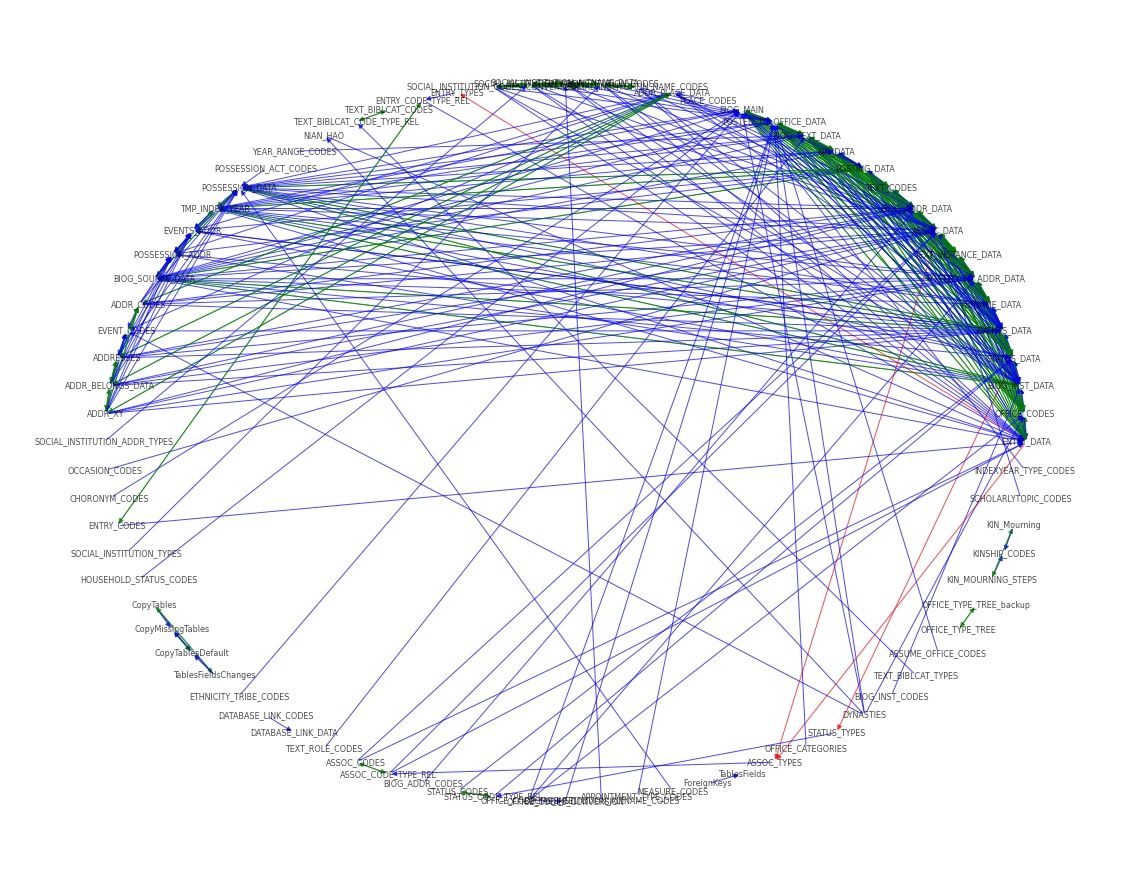

In [203]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 16))
ax=plt.gca()
#pos = nx.spring_layout(G, k=2),
nx.draw_circular(G, node_color='white', edge_color=[G.edges[i]['color'] for i in G.edges], with_labels = True, font_size=8, node_size=30, ax=ax, alpha=0.7)
plt.savefig("table_relationship.pdf", bbox_inches='tight')
plt.show()